<a href="https://colab.research.google.com/github/nasiksami/Deep-Learning/blob/main/Simple_image_classifier_with_ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Neural Network building with fashion_mnist data**

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

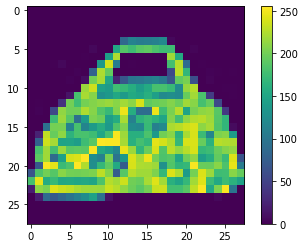

In [ ]:
plt.figure()
plt.imshow(train_images[494])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
##Data Preprocessing

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#this is very important cause if the image pixel number is very high, it will take
#much more time to reach to global minima but in this way we will convert all the images 
#into 0 to 1
#train test both must be done 

In [ ]:
##model building
#sequencial is just simple one 
#the data will move from left to right 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)    #flatten makes 28*28 to 784 
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)   #first hidden layer. Dense meaning fully connected, 128 randomly taken. 
    keras.layers.Dense(10, activation='softmax') # output layer (3)   #O/P layers. The number is same as the numnber of categories we have 
                                                                      #softmax makes the output value ranging between 0 and 1
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
###Compile the Model
#optimizer adam will help to get the global minima 
#loss is sparse categorical crossentropy 


In [ ]:
#training 

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2542 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2451 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [ ]:
#evaluating the model # verbose is how much it is showing on the output
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8853
Test accuracy: 0.8852999806404114


In [ ]:
#accuracy is lesser in testing than in the training. Which means overfitting.
#too many epochs are also not good. 

In [ ]:
#prediction
predictions = model.predict(test_images)
print (predictions[0])

[3.4228673e-08 9.4523304e-13 2.4998233e-08 1.4249187e-12 1.2053584e-09
 3.0163871e-04 5.9930137e-08 2.7847087e-03 3.9086274e-08 9.9691355e-01]


In [ ]:
test_labels[0]

9

In [ ]:
print(np.argmax(predictions[0]))

9


Trouser


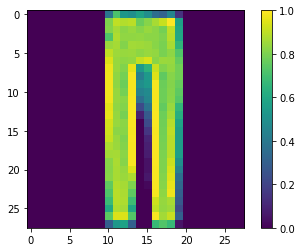

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[214])])
plt.figure()
plt.imshow(test_images[214])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 777


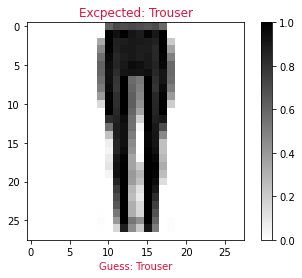

In [ ]:
COLOR = 'crimson'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


# **Lets try again with CNN**

In [ ]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:

# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST 
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,...,25,26,27
0,0,0,0,...,0,0,0
1,0,0,0,...,0,0,0
2,0,0,0,...,0,0,0
3,0,0,0,...,1,1,0
4,0,0,0,...,0,0,3
...,...,...,...,...,...,...,...
23,0,0,74,...,216,170,0
24,2,0,0,...,58,0,0
25,0,0,0,...,0,0,0
26,0,0,0,...,0,0,0


Image (#90): Which is digit '9'


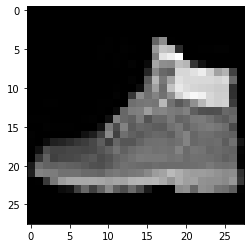

In [ ]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

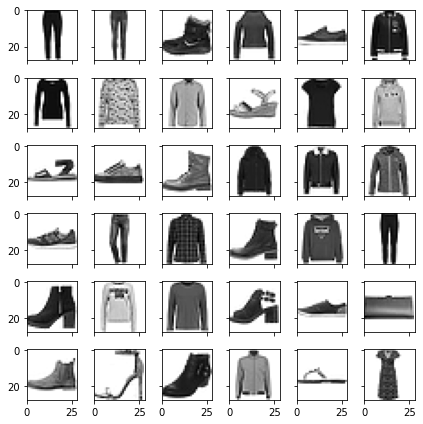

In [ ]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [ ]:

import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))


Epoch 1/12
469/469 - 4s - loss: 0.0802 - accuracy: 0.9696 - val_loss: 0.2533 - val_accuracy: 0.9300
Epoch 2/12
469/469 - 4s - loss: 0.0760 - accuracy: 0.9708 - val_loss: 0.2783 - val_accuracy: 0.9304
Epoch 3/12
469/469 - 4s - loss: 0.0759 - accuracy: 0.9713 - val_loss: 0.2662 - val_accuracy: 0.9307
Epoch 4/12
469/469 - 4s - loss: 0.0731 - accuracy: 0.9718 - val_loss: 0.2724 - val_accuracy: 0.9289
Epoch 5/12
469/469 - 4s - loss: 0.0713 - accuracy: 0.9732 - val_loss: 0.2777 - val_accuracy: 0.9301
Epoch 6/12
469/469 - 4s - loss: 0.0718 - accuracy: 0.9726 - val_loss: 0.2837 - val_accuracy: 0.9287
Epoch 7/12
469/469 - 4s - loss: 0.0676 - accuracy: 0.9732 - val_loss: 0.2783 - val_accuracy: 0.9267
Epoch 8/12
469/469 - 4s - loss: 0.0646 - accuracy: 0.9750 - val_loss: 0.2817 - val_accuracy: 0.9299
Epoch 9/12
469/469 - 4s - loss: 0.0667 - accuracy: 0.9742 - val_loss: 0.2935 - val_accuracy: 0.9295
Epoch 10/12
469/469 - 4s - loss: 0.0635 - accuracy: 0.9758 - val_loss: 0.2975 - val_accuracy: 0.9297

Digit Recognition with CNN

In [9]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [10]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Image (#111): Which is digit '3'


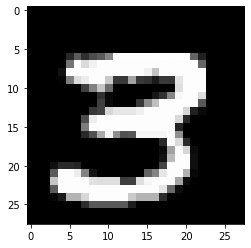

In [13]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 111 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

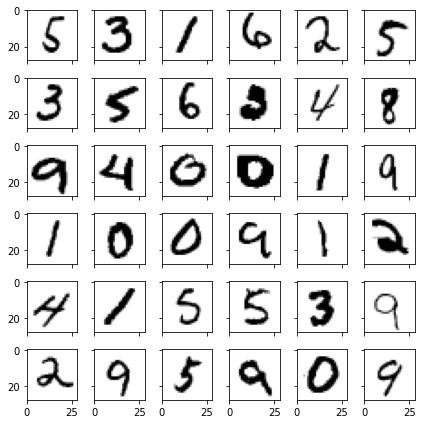

In [14]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [15]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [16]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Epoch 1/12
469/469 - 4s - loss: 0.2211 - accuracy: 0.9327 - val_loss: 0.0506 - val_accuracy: 0.9831
Epoch 2/12
469/469 - 4s - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 3/12
469/469 - 4s - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0295 - val_accuracy: 0.9904
Epoch 4/12
469/469 - 4s - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0289 - val_accuracy: 0.9901
Epoch 5/12
469/469 - 4s - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0250 - val_accuracy: 0.9921
Epoch 6/12
469/469 - 4s - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 7/12
469/469 - 4s - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0236 - val_accuracy: 0.9932
Epoch 8/12
469/469 - 4s - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 9/12
469/469 - 4s - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0236 - val_accuracy: 0.9925
Epoch 10/12
469/469 - 4s - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0248 - val_accuracy: 0.9934

In [18]:

# Predict using either GPU or CPU, send the entire dataset.  This might not work on the GPU.
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.024428334087133408
Test accuracy: 0.993399977684021


In [19]:
from sklearn import metrics

# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 1.0
